# Анализ рекламационной работы машиностроительного производства 

При выявлении несоответствующей продукции покупатель направляет уведомление о браке поставщику и возвращает изделия для исследования причин возникновения дефекта и (при необходимости) ремонта.\
После поступления продукции **и документации**  на завод инженер по претензионно-рекламационной работе проводит исследование возвращенных изделий с целью выявления истинных причин несоответствия и составляет акт исследования, в которым указывает характер дефекта, его причину и дальнейшие действия с продукцией.\
Ключевым показателем в рекламационной работе является срок исследования возвращенной продукции.

Часто **документация** поступает позже изделий, при этом инженер исследует поступившую продукцию как можно быстрее. Из-за этого при рассчете сроков исследования могут быть отрицательные значения (когда изделие было исследовано раньше, чем поступила документация)

1. [Предобработка данных](#start)
2. [Анализ данных](#analysis)
 - [Анализ сроков исследования](#research_period)
 - [Анализ возвращаемых изделий](#title_analysis)
 - [Анализ характера и причин дефектов](#character_defect_analysis)
 - [Расчет процента брака](#defect_rate)
3. [Выводы](#conclusion)

# Цели исследования:
- проанализировать сроки исследования брака
- проанализировать связь количества возвратов с отгрузкой
- оценить дефекты по вине завода
- дать рекомендации по улучшению качества продукции и рекламационной работы

# Описание данных
**title** - номенклатура\
**date_notify** - дата уведомления\
**client** - категория клиента\
**subclient** - конечный клиент\
**date_receipt** - дата поступления изделий\
**defect_character** - характер дефекта\
**cause_defect** - причина дефекта\
**date_doc** - дата поступления документации\
**date_start** - дата начала исследования\
**date_finish** - дата окончания исследования\
**quantity** - количество вернувшихся\
**quantity_notify** - количество изделий в уведомлении\
**research_period** - срок исследования\
**quantity_2020, quantity_2021, quantity_2022, quantity_2023** - отгрузка данной номенклатуры по годам

# Предобработка данных
<a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('C:\\Users\\Project.xlsx', 
                   parse_dates=['date_notify', 'date_receipt', 'date_doc', 'date_start', 'date_finish'])
df.head()

,title,date_notify,сlient,subclient,date_receipt,defect_character,cause_defect,date_doc,date_start,date_finish,quantity,quantity_notify,research_period,quantity_2020,quantity_2021,quantity_2022,quantity_2023
0,A7JDC33M,2022-08-11,Дистрибьютор,BAGTOO7Z,2022-08-18,эксплуатационный,Механическое воздействие/повреждение,2022-08-18,2022-08-19,2022-08-22,1.0,1,5.0,35.0,65.0,45.0,NaN
1,A7JDC33M,2020-09-29,Дистрибьютор,BAGTOO7Z,2020-10-05,NaN,NaN,2020-10-05,NaT,NaT,1.0,1,NaN,35.0,65.0,45.0,NaN
2,A7JDC33M,2020-07-09,Дистрибьютор,BAGTOO7Z,2020-07-16,эксплуатационный,Несоблюдение правил эксплуатации,2020-07-16,2020-07-16,2020-07-21,1.0,1,6.0,35.0,65.0,45.0,NaN
3,A7JDC33M,2022-08-11,Дистрибьютор,BAGTOO7Z,2022-08-18,эксплуатационный,Механическое воздействие/повреждение,2022-08-18,2022-08-19,2022-08-22,1.0,1,5.0,35.0,65.0,45.0,NaN
4,A7JDC33M,2022-08-11,Дистрибьютор,BAGTOO7Z,2022-08-18,эксплуатационный,Механическое воздействие/повреждение,2022-08-18,2022-08-19,2022-08-22,1.0,1,5.0,35.0,65.0,45.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             2016 non-null   object        
 1   date_notify       2016 non-null   datetime64[ns]
 2   сlient            2016 non-null   object        
 3   subclient         2010 non-null   object        
 4   date_receipt      1444 non-null   datetime64[ns]
 5   defect_character  1317 non-null   object        
 6   cause_defect      1314 non-null   object        
 7   date_doc          1441 non-null   datetime64[ns]
 8   date_start        1314 non-null   datetime64[ns]
 9   date_finish       1313 non-null   datetime64[ns]
 10  quantity          1449 non-null   float64       
 11  quantity_notify   2016 non-null   int64         
 12  research_period   1316 non-null   float64       
 13  quantity_2020     1718 non-null   float64       
 14  quantity_2021     1743 n

Датасет состоит из 2017 строк и 18 колонок. Во всех столбцах, кроме 'title', 'date_notify', 'client' и 'quantity_notify' имеются пропуски. Необходимо привести столбцы с количеством ('quantity' и 'total') к целочисленному типу.

In [4]:
# Изменим тип столбцов
df[['research_period', 'quantity', 'quantity_2020',
    'quantity_2021','quantity_2022', 'quantity_2023']] = df[['research_period', 'quantity','quantity_2020', 
                                                             'quantity_2021','quantity_2022','quantity_2023']].astype('Int64')

In [5]:
# Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             2016 non-null   object        
 1   date_notify       2016 non-null   datetime64[ns]
 2   сlient            2016 non-null   object        
 3   subclient         2010 non-null   object        
 4   date_receipt      1444 non-null   datetime64[ns]
 5   defect_character  1317 non-null   object        
 6   cause_defect      1314 non-null   object        
 7   date_doc          1441 non-null   datetime64[ns]
 8   date_start        1314 non-null   datetime64[ns]
 9   date_finish       1313 non-null   datetime64[ns]
 10  quantity          1449 non-null   Int64         
 11  quantity_notify   2016 non-null   int64         
 12  research_period   1316 non-null   Int64         
 13  quantity_2020     1718 non-null   Int64         
 14  quantity_2021     1743 n

In [6]:
# Посмотрим за какой период мы владеем данными
df['date_receipt'].describe()

count                    1444
unique                    306
top       2022-03-03 00:00:00
freq                       30
first     2020-01-23 00:00:00
last      2023-09-07 00:00:00
Name: date_receipt, dtype: object

Мы имеем данные по поступлениям изделий с 2020-01-23 по 2023-07-09.

In [7]:
# Посмотрим на процентное соотношение пропусков в столбцах
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
date_finish,34.900000
date_start,34.800000
cause_defect,34.800000
research_period,34.700000
defect_character,34.700000
date_doc,28.500000
date_receipt,28.400000
quantity,28.100000
quantity_2023,27.400000
quantity_2020,14.800000


Мы видим четкое разделение данных по пропускам на 4 группы. И тут всё логично - меньше всего пропусков в столбцах, связанных с данными из уведомлений (дата уведомления, клиент, название продукции и тд.), больше всего - почти 35% пропусков в столбцах связанных с исследованием, это говорит о том, что многие из вернувшихся изделий еще не исследованы.\
"Оранжевая группа" имеет пропуски т.к. данные за 2023 год не полные.\
Пропуски в столбцах с отгрузкой по годам могут быть связаны с разностью номенклатур (отгружается одна номенклатура (продукция), а возвращается ремонтная (ремонт)).
В нашем случае мы не можем заполнить пропуски синтетическми данными, поэтому оставляем пропуски.

In [8]:
# Проверим наличие дубликатов
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 541


Так как могут возвращаться неколько единиц одной и той же продукции (с разными заводскими номерами), поэтому строки могут дублироваться.\
Дубликаты оставляем.

**ВЫВОД:** провели предобработку данных, привели столбцы к правильному типу, проверили пропуски и дубликаты. Выяснили, что у нас данные о возвратах с 31 декабря 2019 по 07 сентября 2023 года.

# Исследовательский анализ данных
<a id="analysis"></a>

## Анализ сроков исследования
<a id="research_period"></a>

In [9]:
# Оставим строки только с заполненным значением срока исследования
research_period = df.dropna(subset=['research_period'])

In [10]:
# Посмотрим статистику по столбцу
research_period['research_period'].describe()

count    1316.000000
mean        9.433131
std        23.400190
min      -174.000000
25%         2.000000
50%         7.000000
75%        15.000000
max       314.000000
Name: research_period, dtype: float64

Срок исследования колеблется от -174 (из-за того что документы поступили намного позже фактического исследования изделий) до 314 дней. Медиана 7 дней.

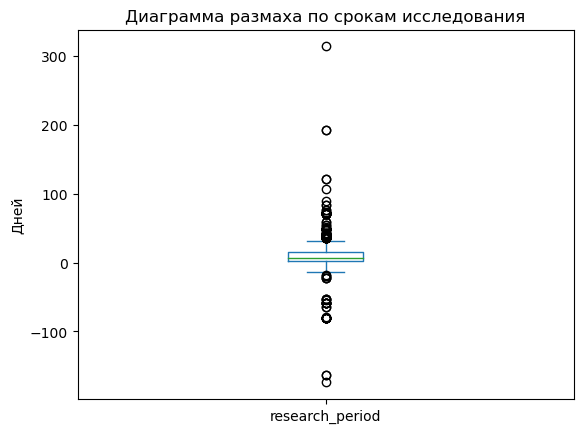

In [11]:
# Построим диаграмму размаха, чтобы оценить выбросы
research_period['research_period'].plot(kind='box')
plt.title('Диаграмма размаха по срокам исследования')
plt.ylabel('Дней');

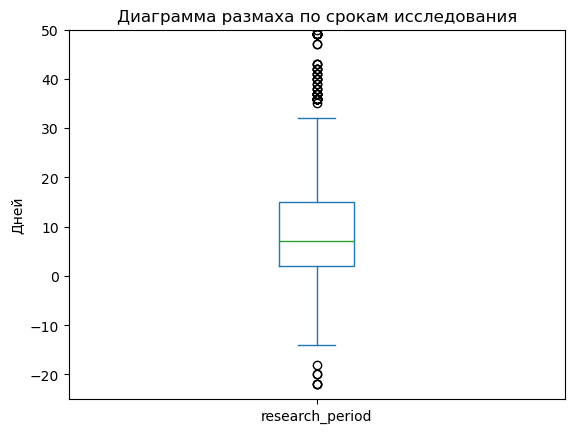

In [12]:
# Масштабируем график
research_period['research_period'].plot(kind='box')
plt.ylim(-25, 50)
plt.title('Диаграмма размаха по срокам исследования')
plt.ylabel('Дней');

Много выбросов свыше 30 дней исследования. Это может быть связано с большим количеством изделий или сложностью в определении истинной причины брака.

In [13]:
# Посмотрим на средний срок исследования по годам
research_period.groupby(research_period['date_receipt'].dt.to_period("Y"))['research_period'].mean()

date_receipt
2020    11.525346
2021    13.920973
2022     6.647182
2023     7.485915
Freq: A-DEC, Name: research_period, dtype: Float64

In [14]:
# Добавим столбец с годом и месяцем поступления
research_period['month'] = research_period['date_receipt'].dt.to_period('M')

In [15]:
# Сгруппируем данные по месяцам и посмотрим на средний срок исследования и количество возвращенных изделий в этом месяце
research_period_quantity = research_period.groupby('month').agg({'research_period': 'mean', 'quantity': 'sum'}).reset_index()
research_period_quantity

,month,research_period,quantity
0,2020-01,26.0,23
1,2020-02,44.8125,16
2,2020-03,4.181818,11
3,2020-04,10.444444,9
4,2020-05,6.777778,9
5,2020-06,9.666667,36
6,2020-07,2.625,8
7,2020-08,8.52381,21
8,2020-09,2.545455,11
9,2020-10,0.0625,42


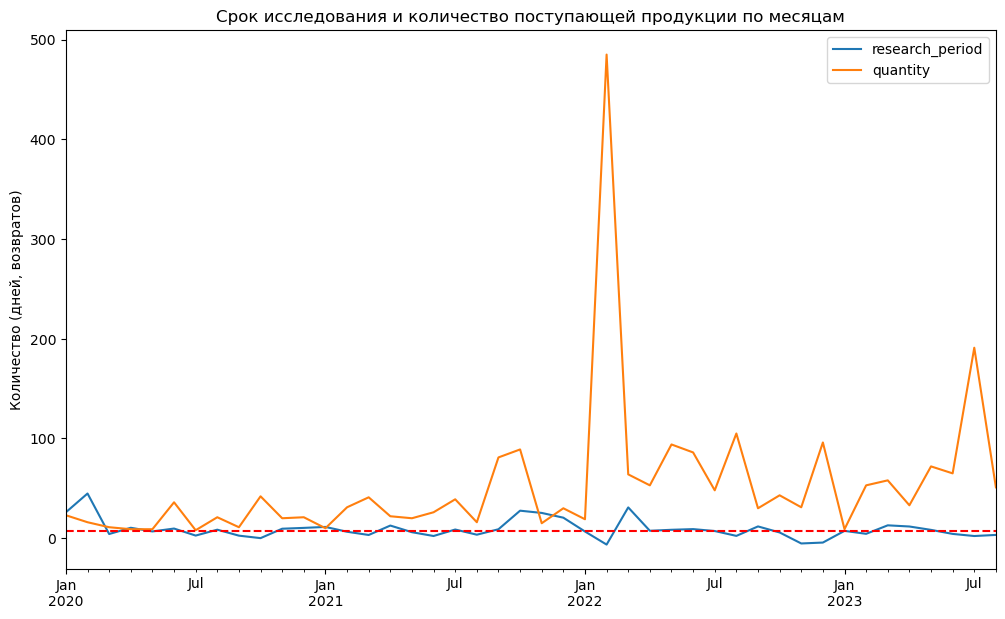

In [16]:
# Построим график для наглядности по месяцам
research_period_quantity.plot(x='month', y=['research_period', 'quantity'], figsize=(12, 7))
plt.axhline(y=7, color='red', linestyle='--') #7 дней - рекомендуемый срок исследования
plt.title('Срок исследования и количество поступающей продукции по месяцам')
plt.ylabel('Количество (дней, возвратов)')
plt.xlabel('');

Как видно по графику средний срок исследования иногда превышает установленные рамки (7 дней). Большие партии как правило возвращаются по одному общему дефекту, поэтому исследование большого количества изделий не всегда приводит к увеличению среднего срока исследования.

## Анализ возвращаемых изделий
<a id="title_analysis"></a>

In [17]:
# Посмотрим на количество возвратов по годам
quantity = df.pivot_table(index=df['date_receipt'].dt.to_period("Y"), values='quantity', aggfunc='sum').reset_index()
quantity

,date_receipt,quantity
0,2020,278
1,2021,477
2,2022,1179
3,2023,606


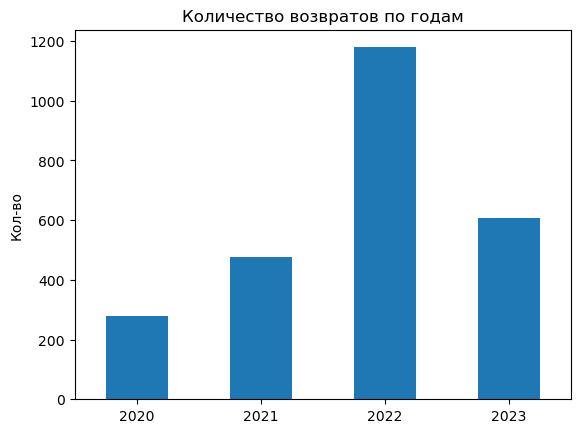

In [18]:
# Построим график
quantity.plot(kind='bar', x='date_receipt', y='quantity', legend=False)
plt.title('Количество возвратов по годам')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Кол-во');

С каждым годом количество возвратов растет (данные за 2023 год не полные, но тенденция сохраняется)

In [19]:
# Составим сводную таблицу по количеству возвращенных изделий
df_title_pivot = df.pivot_table(index='title',
                                values='quantity',
                                aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()
df_title_pivot

,title,quantity
0,7U40OERC,717
1,PKDFNRK6,198
2,BY2CMBT3,128
3,S2A2HZ3E,80
4,XJ2I9O7O,66
...,...,...
371,FU6FNAHD,0
372,F8O2M9KN,0
373,F4NB03U6,0
374,EXY8P9EM,0


In [20]:
# Посмотрим по скольким изделиям были уведомления, но не было возвратов
df_title_pivot[df_title_pivot['quantity'] == 0].count()

title       87
quantity    87
dtype: int64

На 87 изделий есть уведомления, но нет возвратов

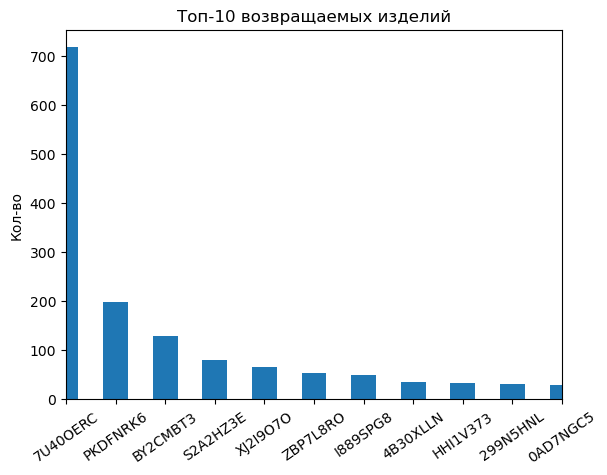

In [21]:
# Построим график ТОП-10 возвращаемых изделий
df_title_pivot.plot(kind='bar', x='title', legend=False)
plt.title('Топ-10 возвращаемых изделий')
plt.ylabel('Кол-во')
plt.xlabel('')
plt.xticks(rotation=35)
plt.xlim(0, 10);

В датасете представлено 376 наименований продукции. Чаще других возвращаются изделия 7U40OERC, PKDFNRK6 и BY2CMBT3.

In [22]:
# Посмотрим на самые часто возвращающиеся изделия в динамике по годам
dinamic_title_df = df.pivot_table(index='title',
                                  columns=pd.to_datetime(df['date_receipt']).dt.to_period("Y"),
                                  values='quantity', aggfunc='sum').reset_index()
dinamic_title_df

date_receipt,title,2020,2021,2022,2023
0,03UE2C0B,<NA>,<NA>,1,<NA>
1,0AD7NGC5,8,21,<NA>,<NA>
2,0D21PZFB,1,<NA>,<NA>,<NA>
3,0F8Z5E7P,<NA>,2,3,<NA>
4,0Q32KCMD,2,<NA>,2,<NA>
...,...,...,...,...,...
282,YQZLBFZH,<NA>,<NA>,1,<NA>
283,YVM8OT92,1,<NA>,<NA>,<NA>
284,ZBP7L8RO,1,4,39,9
285,ZHO2S5JO,<NA>,<NA>,1,<NA>


In [23]:
# Объединим таблицы
dinamic_title_df = dinamic_title_df.merge(df_title_pivot, on='title')
# Отсортируем по количеству
dinamic_title_df = dinamic_title_df.sort_values(by='quantity', ascending=False)
# Удалим столбец с итогами (для построения графика)
dinamic_title_df = dinamic_title_df.drop(columns='quantity')
dinamic_title_df

,title,2020,2021,2022,2023
60,7U40OERC,1,61,521,133
201,PKDFNRK6,<NA>,12,21,165
95,BY2CMBT3,<NA>,61,67,<NA>
232,S2A2HZ3E,<NA>,<NA>,80,<NA>
272,XJ2I9O7O,<NA>,14,20,32
...,...,...,...,...,...
147,J528T38U,<NA>,<NA>,<NA>,1
149,JQJQ9QE8,<NA>,<NA>,1,<NA>
150,JUA1JG4I,1,<NA>,<NA>,<NA>
151,JV5PRW57,<NA>,<NA>,<NA>,1


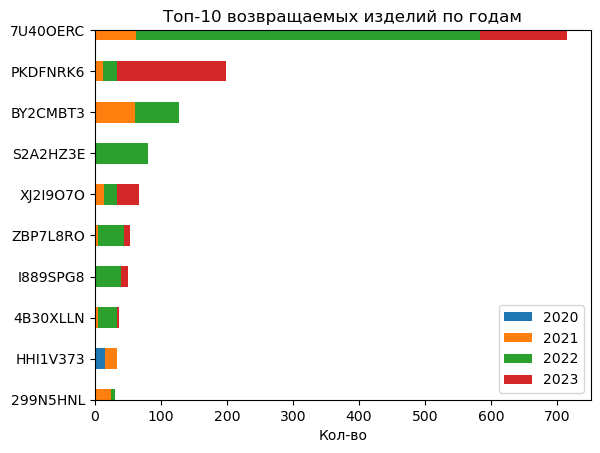

In [24]:
# Построим график ТОП-10 возвращаемых изделий по годам
dinamic_title_df.plot(kind='barh', x='title', stacked=True)
plt.title('Топ-10 возвращаемых изделий по годам')
plt.ylabel('')
plt.xlabel('Кол-во')
plt.ylim(9, 0);

Из графика видно, что подавляющая часть возвратов изделия 7U40OERC была в 2022 году, а PKDFNRK6 - в 2023.\
Изделие BY2CMBT3 было зарекламировано примерно одинаковое количество раз в 2021 и в 2022 годах, к 2023 удалось решить проблему с дефектами в этом изделии.

## Анализ характера и причин дефектов
<a id="character_defect_analysis"></a>

In [25]:
# Составим сводную таблицу по характеру дефектов
df_character_pivot = df.pivot_table(index='defect_character',
                                    values='quantity',
                                    aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()
df_character_pivot

,defect_character,quantity
0,производственный,1187
1,дефект комплектующих,576
2,эксплуатационный,260
3,Не подтвердился,238
4,конструктивный,48
5,не установлен,22
6,Не гарантийный случай,18


In [26]:
# Выделим дефекты по вине завода в отдельную группу
def f(row):
    if row['defect_character'] in ["производственный", "дефект комплектующих", "конструктивный"]:
        val = 'вина завода'
    else:
        val = row['defect_character']
    return val

In [27]:
# Добавим новый столбец к датасету
df['defect_character_group'] = df.apply(f, axis=1)

In [28]:
# Составим сводную таблицу по характеру дефектов с группой дефектов по вине завода
df.pivot_table(index='defect_character_group',
               values='quantity',
               aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()

,defect_character_group,quantity
0,вина завода,1811
1,эксплуатационный,260
2,Не подтвердился,238
3,не установлен,22
4,Не гарантийный случай,18


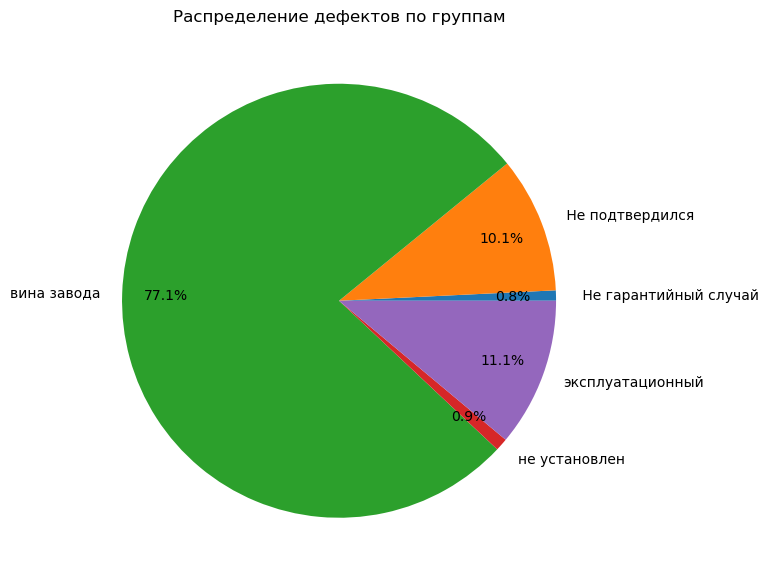

In [29]:
# Построим круговую диаграмму 
df.groupby('defect_character_group')['quantity'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.8, figsize=(7, 8))
plt.title('Распределение дефектов по группам')
plt.ylabel('');

Из всех исследований видно, что дефектов по вине завода больше всего (77,1%).

**Далее для анализа будем изпользовать только заводские дефекты**

In [30]:
# Отсортируем датасет по "вине завода"
df = df.query('defect_character_group == "вина завода"')

In [31]:
# Составим сводную таблицу по причинам дефектов изделий
df_defect_pivot = df.pivot_table(index='cause_defect',
                                 values='quantity',
                                 aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()
df_defect_pivot

,cause_defect,quantity
0,Дефект комплектующих стороннего производства,577
1,Нарушение ТП изготовления,487
2,Нарушение ТП покраски,298
3,Наличие инородных частиц,125
4,Нарушение ТП сборки,85
5,Неточность в КД,77
6,Нарушение ТП сварки,73
7,Нарушение правил транспортировки и хранения,65
8,Неточность в КД,8
9,Механическое воздействие/повреждение,7


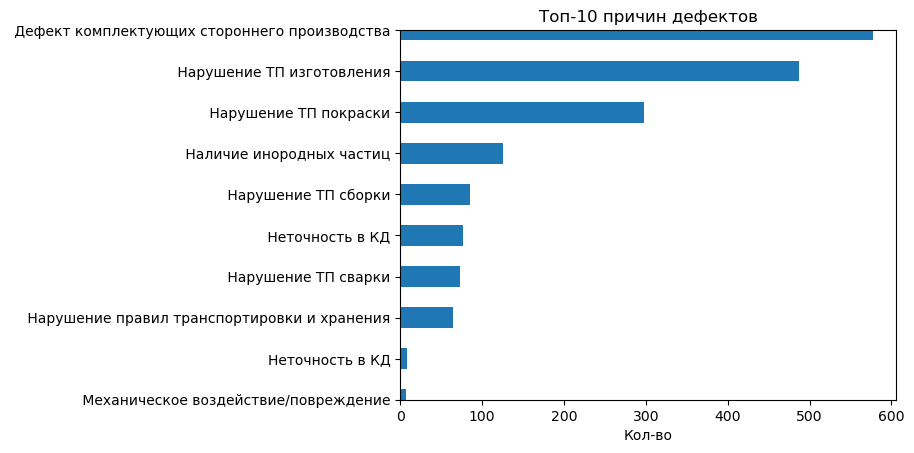

In [32]:
# Построим график ТОП-10 причин дефектов
df_defect_pivot.plot(kind='barh', x='cause_defect', y='quantity', legend=False)
plt.title('Топ-10 причин дефектов')
plt.ylabel('')
plt.xlabel('Кол-во')
plt.ylim(9, 0);

Больше всего дефектов, связанных с покупными комплектующими, нарушением ТП изготовления и нарушением ТП покраски.

In [33]:
# Посмотрим на распределение причин дефектов по годам
dinamic_cause_defect = df.pivot_table(index='cause_defect',
                                      columns=df['date_receipt'].dt.to_period("Y"),
                                      values='quantity', aggfunc='sum').reset_index()
dinamic_cause_defect

date_receipt,cause_defect,2020,2021,2022,2023
0,Дефект комплектующих стороннего производства,11,28,500,38
1,Механическое воздействие/повреждение,<NA>,3,4,<NA>
2,Наличие инородных частиц,25,39,36,25
3,Нарушение ТП изготовления,38,116,272,60
4,Нарушение ТП покраски,25,<NA>,2,271
5,Нарушение ТП сборки,10,42,16,16
6,Нарушение ТП сварки,21,9,20,23
7,Нарушение правил транспортировки и хранения,5,56,4,<NA>
8,Неточность в КД,<NA>,7,70,<NA>
9,Прочее,1,2,<NA>,1


In [34]:
# Объединим таблицы с причиной дефекта
dinamic_cause_defect = dinamic_cause_defect.merge(df_defect_pivot, on='cause_defect')
# отсортируем значения по убыванию
dinamic_cause_defect = dinamic_cause_defect.sort_values(by='quantity', ascending=False)
# Удалим столбец с количеством возвратов
dinamic_cause_defect = dinamic_cause_defect.drop(columns='quantity')

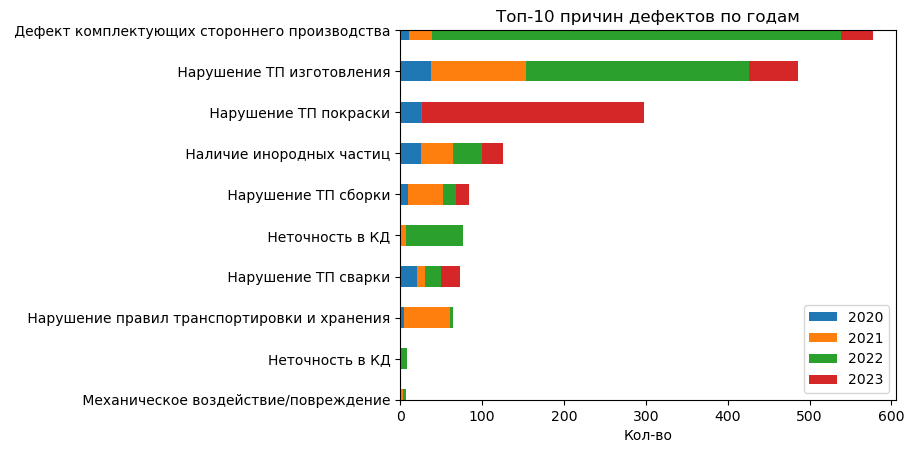

In [35]:
# Построим график ТОП-10 причин дефектов по годам
dinamic_cause_defect.plot(kind='barh', x='cause_defect', stacked=True)
plt.title('Топ-10 причин дефектов по годам')
plt.ylabel('')
plt.xlabel('Кол-во')
plt.ylim(9, 0);

Из графика видно, что в 2022 году были большие проблемы с некачественными комплектующими и техпроцессом изготовления деталей.\
В 2023 году очевидные проблемы с техпроцессом покраски изделий.\
Учитывая пункт 5.1 можно сделать вывод, что проблемы с комплектующими в 2022 году были у изделия 7U40OERC, а проблемы с покраской в 2023 у того же изделия 7U40OERC и у PKDFNRK6.

## Расчет процента брака
<a id="defect_rate"></a>

In [36]:
# Построим сводную таблицу, чтобы сравнить количество отгрузок изделий по годам
sales = df.pivot_table(index='title', 
                       values={'quantity_2020', 'quantity_2021', 'quantity_2022', 'quantity_2023'},
                       aggfunc='first').reset_index()
sales = sales.fillna(0)
sales

,title,quantity_2020,quantity_2021,quantity_2022,quantity_2023
0,03UE2C0B,4,28,19,0
1,0AD7NGC5,54,123,75,0
2,0F8Z5E7P,87,93,25,41
3,0Q32KCMD,19,10,53,48
4,0XQGEP6Z,139,300,207,109
...,...,...,...,...,...
203,YLENW840,382,525,492,155
204,YNYK3NC1,12,12,8,16
205,ZBP7L8RO,47,158,100,1
206,ZHO2S5JO,40,38,40,20


In [37]:
# Посчитаем общую сумму отгрузок
sales['total'] = sales['quantity_2020'] + sales['quantity_2021'] + sales['quantity_2022'] + sales['quantity_2023']
# добавим столбец с количеством возвратов
sales = sales.merge(df_title_pivot, on='title')
sales

,title,quantity_2020,quantity_2021,quantity_2022,quantity_2023,total,quantity
0,03UE2C0B,4,28,19,0,51,1
1,0AD7NGC5,54,123,75,0,252,29
2,0F8Z5E7P,87,93,25,41,246,5
3,0Q32KCMD,19,10,53,48,130,4
4,0XQGEP6Z,139,300,207,109,755,8
...,...,...,...,...,...,...,...
203,YLENW840,382,525,492,155,1554,3
204,YNYK3NC1,12,12,8,16,48,10
205,ZBP7L8RO,47,158,100,1,306,53
206,ZHO2S5JO,40,38,40,20,138,1


In [38]:
# Рассчитаем общий процент брака за имеющийся период
sales['defect_rate'] = round(sales['quantity']*100 / sales['total'], 2)
# Избавимся от некорректных значений
sales = sales[(sales['defect_rate'] != 0) & (sales['total'] > 0) & (sales['defect_rate'] < 100)]
# Сортируем таблицу по самым массовым изделиям
sales.sort_values(by='total', ascending=False).head(10)

,title,quantity_2020,quantity_2021,quantity_2022,quantity_2023,total,quantity,defect_rate
147,PKDFNRK6,2914,6551,6735,2540,18740,198,1.06
42,7U40OERC,2898,6335,6818,2296,18347,717,3.91
50,8S2OOUFT,2310,2620,200,0,5130,26,0.51
177,TJ8II02Y,640,1284,1827,260,4011,14,0.35
196,XJ2I9O7O,667,1328,1772,227,3994,66,1.65
54,93IR25O0,645,1050,1337,501,3533,1,0.03
10,3D4XUOS6,522,798,1065,699,3084,8,0.26
121,LHQLUFM5,850,807,393,50,2100,1,0.05
89,H0QE6IGA,405,521,579,285,1790,5,0.28
173,T2HMNR25,177,390,646,482,1695,5,0.29


Среди самых массовых изделий всё те же два наименования 7U40OERC и PKDFNRK6 у них 3,91% и 1,06% брака соответственно .

In [39]:
# Посмотрим на 10 самых дефектных изделий
sales.sort_values(by='defect_rate', ascending=False).head(10)

,title,quantity_2020,quantity_2021,quantity_2022,quantity_2023,total,quantity,defect_rate
32,61ZQHKTV,0,1,3,0,4,3,75.0
152,QG9TF5P0,3,0,0,0,3,2,66.67
26,4PJXKN9I,2,1,0,0,3,2,66.67
96,HNAY6AWE,0,2,6,0,8,5,62.5
142,OEIBW8G3,0,15,2,0,17,10,58.82
151,QE9XGSX7,0,1,3,0,4,2,50.0
61,AT9NVDCI,2,2,0,0,4,2,50.0
48,8MZFA6TX,6,18,0,1,25,8,32.0
103,IHQ5R8IC,0,0,25,0,25,8,32.0
87,GMA10A5H,6,7,0,0,13,4,30.77


Похоже стоит уделить внимание не только самым массовым изделиям. У малопартийных изделий явные проблемы с качеством. В то же время стоит отметить, что большая часть из них в 2023 году не производилась (возможно потребители отказались от них ввиду низкого качества).

In [40]:
# Посмотрим на 10 самых дефектных изделий (у которых были отгрузки в 2023 году)
sales[sales['quantity_2023'] > 0].sort_values(by='defect_rate', ascending=False).head(10)

,title,quantity_2020,quantity_2021,quantity_2022,quantity_2023,total,quantity,defect_rate
48,8MZFA6TX,6,18,0,1,25,8,32.0
164,RJ9OOO82,1,5,0,4,10,3,30.0
183,V3REAQU2,9,17,0,1,27,8,29.63
153,QKFG9OHZ,1,7,6,7,21,6,28.57
168,S2A2HZ3E,62,57,183,10,312,80,25.64
86,GAQB6IGP,6,19,0,3,28,7,25.0
82,FOLGP62O,0,0,0,4,4,1,25.0
20,42UWB3PJ,7,13,0,1,21,5,23.81
21,4B30XLLN,41,45,43,36,165,36,21.82
204,YNYK3NC1,12,12,8,16,48,10,20.83


В первой десятке можно выделить 2 более-менее массовых изделия - S2A2HZ3E и 4B30XLLN.

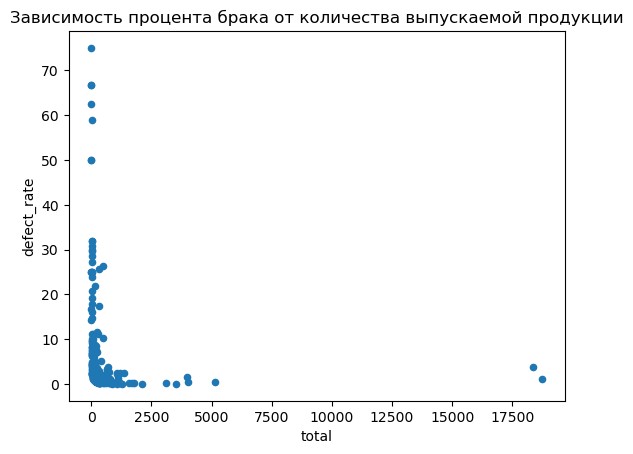

In [41]:
# Построим график корреляции количества брака от выпущенной продукции
sales.plot(kind='scatter', x='total', y='defect_rate')
plt.title('Зависимость процента брака от количества выпускаемой продукции')
plt.show()

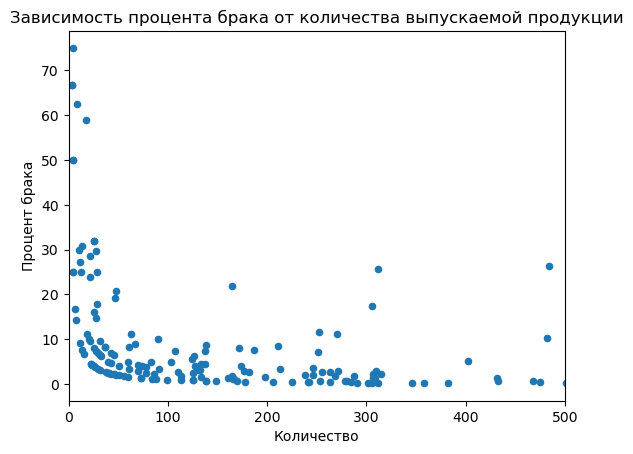

In [42]:
# Масштабируем график для лучшей наглядности
sales.plot(kind='scatter', x='total', y='defect_rate')
plt.title('Зависимость процента брака от количества выпускаемой продукции')
plt.ylabel('Процент брака')
plt.xlabel('Количество')
plt.xlim(0, 500)
plt.show()

На графике видно, что самый высокий процент брака у изделий, которых было выпущено менее 100шт за имеющийся период. Также можно заметить 4 отдельных точки с высоким процентом брака у более массовых изделий.

Для расчета общезаводского процента брака необходимо знать общее количество отгруженных изделий. Таких данных у нас нет. Это также не позволяет оценить динамику процента брака выпускаемых изделий по годам, к тому же гарантийный срок изделий составляет 1,5 года с даты производства, поэтому для корректного подсчета процента брака по годам необходимо знать дату выпуска продукции.

# Выводы 
<a id="conclusion"></a>

- количество брака из года в год увеличивается
- средний срок исследования укладывается в рекомендуемый, **НО** судя по 2020 и 2021 годам, а также учитывая тот факт, что данные за 2023 год не полные, следует расширить штат инженеров для сокращения сроков
- в 2022 году были большие партии возвратов с одним общим дефектом и задержки с документами, что сократило средний срок исследования
- большая чать дефектов (77%) признана виной завода, необходимо провести корректирующие мероприятия по улучшению качества продукции, а также провести работу с поставщиками комплектующих
- так как больше всего дефектов связано с нарушением ТП изготовления и нарушением ТП покраски, следует обратить внимание на парк станков и квалификацию работников
- стоит уделить отдельное внимание качеству мелкопартийных изделий, т.к. у них очень высокий процент брака